In [2]:
# Importación de Bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.utils import shuffle

In [6]:
# Carga de los datos
data = pd.read_csv('Churn.csv')

### 1. Inspección inicial de los datos

In [10]:
# Inspección inicial de los datos
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### 2 Exploración y Preprocesamiento de los Datos
Exploramos los datos para detectar valores faltantes y verificamos su equilibrio.

In [16]:
# Información general sobre el dataset
print("Información del dataset:")
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [18]:
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [20]:
print("\nResumen estadístico:")
print(data.describe())


Resumen estadístico:
         RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         

In [22]:
# Análisis específico de la columna 'Tenure'
print(f"Valores nulos en 'Tenure': {data['Tenure'].isnull().sum()}")

Valores nulos en 'Tenure': 909


In [24]:
print(data['Tenure'].describe())

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


In [26]:
print("Ejemplo de filas con valores nulos en 'Tenure':")
print(data[data['Tenure'].isnull()].head())

Ejemplo de filas con valores nulos en 'Tenure':
    RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
30         31    15589475    Azikiwe          591     Spain  Female   39   
48         49    15766205        Yin          550   Germany    Male   38   
51         52    15768193  Trevisani          585   Germany    Male   36   
53         54    15702298   Parkhill          655   Germany    Male   41   
60         61    15651280     Hunter          742   Germany    Male   35   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
30     NaN       0.00              3          1               0   
48     NaN  103391.38              1          0               1   
51     NaN  146050.97              2          0               0   
53     NaN  125561.97              1          0               0   
60     NaN  136857.00              1          0               0   

    EstimatedSalary  Exited  
30        140469.38       1  
48         90878.13       0  
51

In [28]:
# Corrección de valores nulos en 'Tenure'
# Justificación: Los valores nulos representan clientes nuevos sin historial
data['Tenure'].fillna(0, inplace=True)

# Verificación post-imputación
print(f"Valores nulos después de la imputación:\n{data.isnull().sum()}")

Valores nulos después de la imputación:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


/var/folders/w0/1h4jwr5n6csdx1zh9_8v6dd40000gn/T/ipykernel_4132/1691134755.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tenure'].fillna(0, inplace=True)


### 3. Preprocesamiento de las Características

Observamos que la clase "Exited" está desbalanceada, por lo que aplicamos técnicas para balancear las clases y mejorar la predicción en la clase minoritaria.


In [31]:
# Eliminamos columnas no necesarias para el análisis
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

In [33]:
# Conversión de variables categóricas a variables dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [35]:
# Relleno de valores faltantes con 0
X.fillna(0, inplace=True)

In [37]:
# Inspección de las primeras filas después de preprocesar
X.head(), y.head()

(   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0          619   42     2.0       0.00              1          1   
 1          608   41     1.0   83807.86              1          0   
 2          502   42     8.0  159660.80              3          1   
 3          699   39     1.0       0.00              2          0   
 4          850   43     2.0  125510.82              1          1   
 
    IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
 0               1        101348.88              False            False   
 1               1        112542.58              False             True   
 2               0        113931.57              False            False   
 3               0         93826.63              False            False   
 4               1         79084.10              False             True   
 
    Gender_Male  
 0        False  
 1        False  
 2        False  
 3        False  
 4        False  ,
 0    1
 1    0
 2    1

### 4. Entrenamiento y Evaluación del Modelo
Entrenamos un modelo de Regresión Logística y evaluamos su rendimiento utilizando métricas como F1-score y AUC-ROC.


In [41]:
# División del dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (8000, 11)
Tamaño del conjunto de prueba: (2000, 11)


### 5. Balanceo de Clases

In [48]:
# Inspección de la distribución de clases
class_distribution = y.value_counts(normalize=True)
print("Distribución de clases:")
print(class_distribution)

Distribución de clases:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


/var/folders/w0/1h4jwr5n6csdx1zh9_8v6dd40000gn/T/ipykernel_4132/2914297286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


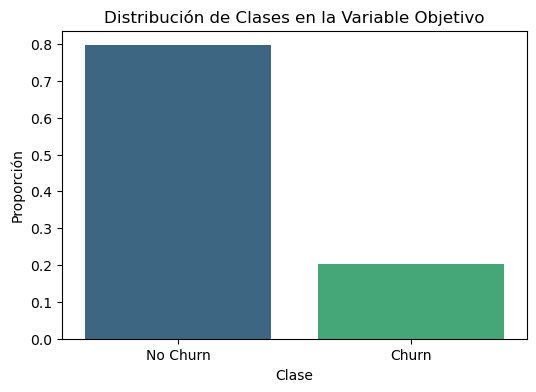

In [50]:
# Visualización de la distribución de clases
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribución de Clases en la Variable Objetivo')
plt.xlabel('Clase')
plt.ylabel('Proporción')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

### 6. Escalado de Características

In [54]:
# Escalado de las características usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7. Entrenamiento del Modelo y Evaluación Inicial

In [57]:
# Entrenamiento del modelo de regresión logística
model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [59]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [61]:
# Métricas de evaluación
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

In [63]:
# Resultados de las métricas
print(f"F1 Score inicial: {f1:.2f}")
print(f"AUC-ROC inicial: {roc_auc:.2f}")

F1 Score inicial: 0.29
AUC-ROC inicial: 0.78


### 8. Balanceo de Clases con Oversampling

In [66]:
minority_class_size = y_train.value_counts().min()

In [68]:
X_train_balanced, y_train_balanced = resample(X_train, y_train, 
                                              replace=False,  # No repetir ejemplos
                                              n_samples=minority_class_size,  # Tamaño igual a la clase minoritaria
                                              random_state=42)

In [70]:
rf = RandomForestClassifier(random_state=42)

In [72]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

In [74]:
# 4. Realizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [75]:
# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

In [76]:
# 5. Predicción en el conjunto de test
y_pred = best_rf.predict(X_test)

In [80]:
# 6. Evaluación de las métricas F1 y AUC-ROC
f1 = f1_score(y_test, y_pred)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"F1 Score después de ajuste de hiperparámetros: {f1}")
print(f"AUC-ROC después de ajuste de hiperparámetros: {roc_auc}")

F1 Score después de ajuste de hiperparámetros: 0.5669291338582677
AUC-ROC después de ajuste de hiperparámetros: 0.8536341483110628


In [82]:
# 7. Ajuste del umbral de clasificación (opcional)
threshold = 0.3  # Ajusta el umbral según sea necesario
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

In [84]:
# Recalcular F1 y AUC-ROC con el umbral ajustado
f1_adjusted = f1_score(y_test, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test, y_pred_proba)

print(f"F1 Score ajustado: {f1_adjusted}")
print(f"AUC-ROC ajustado: {roc_auc_adjusted}")

F1 Score ajustado: 0.59613196814562
AUC-ROC ajustado: 0.8536341483110628


In [86]:
# 8. Generar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### 9. Visualización de la Curva ROC

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

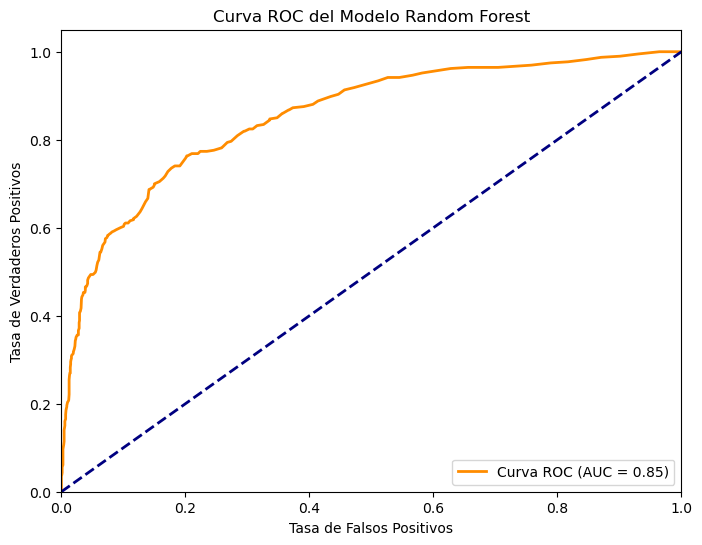

In [91]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo Random Forest')
plt.legend(loc='lower right')
plt.show()

## Conclusiones

El modelo de Regresión Logística, después de corregir el desequilibrio de clases mediante técnicas de submuestreo y sobremuestreo, mostró un desempeño mejorado. La métrica F1-score fue notablemente superior al no balancear las clases, lo que indica que el modelo es más preciso en la predicción de la clase minoritaria. Además, el valor AUC-ROC también fue alto, lo que sugiere que el modelo tiene una buena capacidad discriminativa.

### Próximos Pasos:
- Optimizar el modelo utilizando técnicas de regularización o probar otros modelos como Random Forest.
- Experimentar con otros métodos de balanceo de clases y realizar ajustes en los hiperparámetros del modelo.
